In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/src")
import helpers as hlp

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load & Merge CSV Data for All Cities

In [3]:
# Get all CSV files, 1 per city
data_dir = '../data/OpinRankDatasetWithJudgments/hotels/data/'
csv_filenames = hlp.find_filenames(data_dir, suffix='.csv')
csv_filenames

['dubai.csv',
 'new-delhi.csv',
 'new-york-city.csv',
 'san-francisco.csv',
 'las-vegas.csv',
 'chicago.csv',
 'shanghai.csv',
 'montreal.csv',
 'beijing.csv',
 'london.csv']

In [4]:
len(csv_filenames)

10

In [5]:
dfs = []
for name in csv_filenames:
    dfs.append(pd.read_csv(data_dir + name))
df_all_cities = pd.concat(dfs, ignore_index=True)
df_all_cities.shape

(3105, 18)

# CSV Data Cleaning

In [6]:
df_all_cities.head()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
0,grosvenor house west marina beach by le meridi...,http://www.tripadvisor.com/ShowUserReviews-g29...,al sofouh road,dubai,-1,ARE,8500,-1,-1,299,4.900862,4.810345,4.814655,4.202586,4.560345,0.0,4.657759,NaN
1,mina a salam at madinat jumeirah,http://www.tripadvisor.com/ShowUserReviews-g29...,p.o. box 75157,dubai,-1,ARE,-1,-1,-1,425,4.918367,4.826531,4.724490,4.880952,4.326531,0.0,4.735374,NaN
2,al manzil hotel,http://www.tripadvisor.com/ShowUserReviews-g29...,burj dubai,dubai,-1,ARE,-1,-1,-1,129,4.914530,4.649573,4.786325,4.341880,4.632479,0.0,4.664957,NaN
3,le royal meridien beach resort spa,http://www.tripadvisor.com/ShowUserReviews-g29...,al sofouh road,dubai,-1,ARE,24970,-1,-1,320,4.913621,4.714286,4.877076,4.694352,4.328904,0.0,4.705648,NaN
4,dar al masyaf at madinat jumeirah,http://www.tripadvisor.com/ShowUserReviews-g29...,madinat jumeirah resort,dubai,-1,ARE,75157,-1,-1,213,4.951220,4.890244,4.664634,4.847561,4.402439,0.0,4.751220,NaN


In [7]:
df_all_cities.tail()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
3100,uk_england_london_whiteleaf_hotel,whiteleaf hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w2 3lb,-1,-1,70.0,1.395833,1.312500,1.541667,3.333333,1.541667,0.0,1.825000
3101,uk_england_london_the_continental_hotel,the continental hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w2 1rt,-1,-1,9.0,1.000000,1.000000,1.111111,2.111111,1.000000,0.0,1.244444
3102,uk_england_london_regency_court_hotel,regency court hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw5 9st,-1,-1,21.0,1.307692,1.230769,1.307692,3.461538,1.307692,0.0,1.723077
3103,uk_england_london_earls_court_gardens_hotel,earls court gardens hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw5 0tr,-1,-1,19.0,1.285714,1.142857,1.714286,2.928571,1.285714,0.0,1.671429
3104,uk_england_london_four_seasons_hotel_london_cu...,four seasons hotel london currently closed,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w1j 7dr,-1,-1,36.0,4.625000,3.875000,4.437500,4.687500,3.625000,0.0,4.250000


In [8]:
df_all_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 18 columns):
doc_id                  3105 non-null object
hotel_name              3105 non-null object
hotel_url               3105 non-null object
street                  3105 non-null object
city                    3105 non-null object
state                   3105 non-null object
country                 3105 non-null object
zip                     3105 non-null object
class                   3105 non-null object
price                   3105 non-null int64
num_reviews             3105 non-null float64
CLEANLINESS             3105 non-null float64
ROOM                    3105 non-null float64
SERVICE                 3105 non-null float64
LOCATION                3105 non-null float64
VALUE                   3105 non-null float64
COMFORT                 3105 non-null float64
overall_ratingsource    995 non-null float64
dtypes: float64(8), int64(1), object(9)
memory usage: 436.8+ KB


In [9]:
# Check null vals
hlp.get_nulls(df_all_cities)

,Total,Percent,Type
overall_ratingsource,2110,0.679549,float64
COMFORT,0,0.000000,float64
hotel_name,0,0.000000,object
hotel_url,0,0.000000,object
street,0,0.000000,object
city,0,0.000000,object
state,0,0.000000,object
country,0,0.000000,object
zip,0,0.000000,object
class,0,0.000000,object


## Fix rows with null overall_ratingsource (shift some columns by 1 to the right)

In [10]:
# Get rows with null overall_ratingsource
df_all_cities_shifted = df_all_cities[df_all_cities['overall_ratingsource'].isna()].copy()
df_all_cities_shifted.head()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
0,grosvenor house west marina beach by le meridi...,http://www.tripadvisor.com/ShowUserReviews-g29...,al sofouh road,dubai,-1,ARE,8500,-1,-1,299,4.900862,4.810345,4.814655,4.202586,4.560345,0.0,4.657759,NaN
1,mina a salam at madinat jumeirah,http://www.tripadvisor.com/ShowUserReviews-g29...,p.o. box 75157,dubai,-1,ARE,-1,-1,-1,425,4.918367,4.826531,4.724490,4.880952,4.326531,0.0,4.735374,NaN
2,al manzil hotel,http://www.tripadvisor.com/ShowUserReviews-g29...,burj dubai,dubai,-1,ARE,-1,-1,-1,129,4.914530,4.649573,4.786325,4.341880,4.632479,0.0,4.664957,NaN
3,le royal meridien beach resort spa,http://www.tripadvisor.com/ShowUserReviews-g29...,al sofouh road,dubai,-1,ARE,24970,-1,-1,320,4.913621,4.714286,4.877076,4.694352,4.328904,0.0,4.705648,NaN
4,dar al masyaf at madinat jumeirah,http://www.tripadvisor.com/ShowUserReviews-g29...,madinat jumeirah resort,dubai,-1,ARE,75157,-1,-1,213,4.951220,4.890244,4.664634,4.847561,4.402439,0.0,4.751220,NaN


In [11]:
# Rename cols to shift data
new_cols = list(df_all_cities_shifted.columns)
new_cols.remove('hotel_name')
new_cols.append('drop')
new_cols

['doc_id',
 'hotel_url',
 'street',
 'city',
 'state',
 'country',
 'zip',
 'class',
 'price',
 'num_reviews',
 'CLEANLINESS',
 'ROOM',
 'SERVICE',
 'LOCATION',
 'VALUE',
 'COMFORT',
 'overall_ratingsource',
 'drop']

In [12]:
# Use renamed cols to shift data
df_all_cities_shifted.columns = new_cols
df_all_cities_shifted.head()

,doc_id,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource,drop
0,grosvenor house west marina beach by le meridi...,http://www.tripadvisor.com/ShowUserReviews-g29...,al sofouh road,dubai,-1,ARE,8500,-1,-1,299,4.900862,4.810345,4.814655,4.202586,4.560345,0.0,4.657759,NaN
1,mina a salam at madinat jumeirah,http://www.tripadvisor.com/ShowUserReviews-g29...,p.o. box 75157,dubai,-1,ARE,-1,-1,-1,425,4.918367,4.826531,4.724490,4.880952,4.326531,0.0,4.735374,NaN
2,al manzil hotel,http://www.tripadvisor.com/ShowUserReviews-g29...,burj dubai,dubai,-1,ARE,-1,-1,-1,129,4.914530,4.649573,4.786325,4.341880,4.632479,0.0,4.664957,NaN
3,le royal meridien beach resort spa,http://www.tripadvisor.com/ShowUserReviews-g29...,al sofouh road,dubai,-1,ARE,24970,-1,-1,320,4.913621,4.714286,4.877076,4.694352,4.328904,0.0,4.705648,NaN
4,dar al masyaf at madinat jumeirah,http://www.tripadvisor.com/ShowUserReviews-g29...,madinat jumeirah resort,dubai,-1,ARE,75157,-1,-1,213,4.951220,4.890244,4.664634,4.847561,4.402439,0.0,4.751220,NaN


In [13]:
# Drop extra col after shifting data
df_all_cities_shifted.drop(columns=['drop'], inplace=True)
df_all_cities_shifted.head()

,doc_id,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
0,grosvenor house west marina beach by le meridi...,http://www.tripadvisor.com/ShowUserReviews-g29...,al sofouh road,dubai,-1,ARE,8500,-1,-1,299,4.900862,4.810345,4.814655,4.202586,4.560345,0.0,4.657759
1,mina a salam at madinat jumeirah,http://www.tripadvisor.com/ShowUserReviews-g29...,p.o. box 75157,dubai,-1,ARE,-1,-1,-1,425,4.918367,4.826531,4.724490,4.880952,4.326531,0.0,4.735374
2,al manzil hotel,http://www.tripadvisor.com/ShowUserReviews-g29...,burj dubai,dubai,-1,ARE,-1,-1,-1,129,4.914530,4.649573,4.786325,4.341880,4.632479,0.0,4.664957
3,le royal meridien beach resort spa,http://www.tripadvisor.com/ShowUserReviews-g29...,al sofouh road,dubai,-1,ARE,24970,-1,-1,320,4.913621,4.714286,4.877076,4.694352,4.328904,0.0,4.705648
4,dar al masyaf at madinat jumeirah,http://www.tripadvisor.com/ShowUserReviews-g29...,madinat jumeirah resort,dubai,-1,ARE,75157,-1,-1,213,4.951220,4.890244,4.664634,4.847561,4.402439,0.0,4.751220


## Get rows with non-null overall ratings (unshifted data)

In [14]:
df_all_cities_wratings = df_all_cities.copy()
df_all_cities_wratings = df_all_cities_wratings[~df_all_cities_wratings['overall_ratingsource'].isna()].copy()
df_all_cities_wratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 2110 to 3104
Data columns (total 18 columns):
doc_id                  995 non-null object
hotel_name              995 non-null object
hotel_url               995 non-null object
street                  995 non-null object
city                    995 non-null object
state                   995 non-null object
country                 995 non-null object
zip                     995 non-null object
class                   995 non-null object
price                   995 non-null int64
num_reviews             995 non-null float64
CLEANLINESS             995 non-null float64
ROOM                    995 non-null float64
SERVICE                 995 non-null float64
LOCATION                995 non-null float64
VALUE                   995 non-null float64
COMFORT                 995 non-null float64
overall_ratingsource    995 non-null float64
dtypes: float64(8), int64(1), object(9)
memory usage: 147.7+ KB


In [15]:
df_all_cities_wratings.head()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
2110,uk_england_london_the_milestone_hotel,the milestone hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w8 5dl,-1,-1,175.0,4.897638,4.779528,4.913386,4.779528,4.503937,0.0,4.774803
2111,uk_england_london_the_soho_hotel,the soho hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w1d 3dh,-1,-1,209.0,4.958824,4.894118,4.764706,4.817647,4.329412,0.0,4.752941
2112,uk_england_london_hotel_41,hotel 41,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1w 0ps,-1,-1,323.0,4.871681,4.592920,4.858407,4.623894,4.367257,0.0,4.662832
2113,uk_england_london_sofitel_st_james_london,sofitel st james london,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1y 4an,-1,-1,379.0,4.816406,4.597656,4.585938,4.867188,4.257812,0.0,4.625000
2114,uk_england_london_the_halkin,the halkin,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1x 7dj,-1,-1,65.0,4.923077,4.666667,4.615385,4.615385,4.179487,0.0,4.600000


In [16]:
df_all_cities_wratings['city'].unique()

array(['london'], dtype=object)

## Merge shifted data and unshifted data

In [17]:
df_all_cities_cleaned = pd.concat([df_all_cities_wratings, df_all_cities_shifted], ignore_index=True, sort=False)
df_all_cities_cleaned.head()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
0,uk_england_london_the_milestone_hotel,the milestone hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w8 5dl,-1,-1,175.0,4.897638,4.779528,4.913386,4.779528,4.503937,0.0,4.774803
1,uk_england_london_the_soho_hotel,the soho hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w1d 3dh,-1,-1,209.0,4.958824,4.894118,4.764706,4.817647,4.329412,0.0,4.752941
2,uk_england_london_hotel_41,hotel 41,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1w 0ps,-1,-1,323.0,4.871681,4.592920,4.858407,4.623894,4.367257,0.0,4.662832
3,uk_england_london_sofitel_st_james_london,sofitel st james london,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1y 4an,-1,-1,379.0,4.816406,4.597656,4.585938,4.867188,4.257812,0.0,4.625000
4,uk_england_london_the_halkin,the halkin,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1x 7dj,-1,-1,65.0,4.923077,4.666667,4.615385,4.615385,4.179487,0.0,4.600000


In [18]:
df_all_cities_cleaned.tail()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
3100,zhonguanyuan global village pku,NaN,http://www.tripadvisor.com/ShowUserReviews-g29...,no.126 zhongguancun north main street haidian...,beijing,-1,China,100089,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3101,hanting express beijing zhongguancun south,NaN,http://www.tripadvisor.com/ShowUserReviews-g29...,no.17 daliushu road-a haidian district,beijing,-1,China,100081,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3102,guoren hotel,NaN,http://www.tripadvisor.com/ShowUserReviews-g29...,no.a 2 qianmen east street chongwen district,beijing,-1,China,100051,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3103,home inn beijing cai shi kou,NaN,http://www.tripadvisor.com/ShowUserReviews-g29...,no.38 south main street caishikou xuanwu dis...,beijing,-1,China,100045,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3104,baolinxuan international hotel,NaN,http://www.tripadvisor.com/ShowUserReviews-g29...,no.80 south xizhan road (xizhan nan lu),beijing,-1,China,100055,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0


In [19]:
df_all_cities_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 18 columns):
doc_id                  3105 non-null object
hotel_name              995 non-null object
hotel_url               3105 non-null object
street                  3105 non-null object
city                    3105 non-null object
state                   3105 non-null object
country                 3105 non-null object
zip                     3105 non-null object
class                   3105 non-null object
price                   3105 non-null object
num_reviews             3105 non-null float64
CLEANLINESS             3105 non-null float64
ROOM                    3105 non-null float64
SERVICE                 3105 non-null float64
LOCATION                3105 non-null float64
VALUE                   3105 non-null float64
COMFORT                 3105 non-null float64
overall_ratingsource    3105 non-null float64
dtypes: float64(8), object(10)
memory usage: 436.8+ KB


In [20]:
# Re-check nulls
hlp.get_nulls(df_all_cities_cleaned)

,Total,Percent,Type
hotel_name,2110,0.679549,object
overall_ratingsource,0,0.000000,float64
COMFORT,0,0.000000,float64
hotel_url,0,0.000000,object
street,0,0.000000,object
city,0,0.000000,object
state,0,0.000000,object
country,0,0.000000,object
zip,0,0.000000,object
class,0,0.000000,object


## For null hotel_name, impute with doc_id

In [21]:
df_all_cities_cleaned.loc[df_all_cities_cleaned['hotel_name'].isnull(), 'hotel_name'] = df_all_cities_cleaned.loc[df_all_cities_cleaned['hotel_name'].isnull(), 'doc_id']
df_all_cities_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 18 columns):
doc_id                  3105 non-null object
hotel_name              3105 non-null object
hotel_url               3105 non-null object
street                  3105 non-null object
city                    3105 non-null object
state                   3105 non-null object
country                 3105 non-null object
zip                     3105 non-null object
class                   3105 non-null object
price                   3105 non-null object
num_reviews             3105 non-null float64
CLEANLINESS             3105 non-null float64
ROOM                    3105 non-null float64
SERVICE                 3105 non-null float64
LOCATION                3105 non-null float64
VALUE                   3105 non-null float64
COMFORT                 3105 non-null float64
overall_ratingsource    3105 non-null float64
dtypes: float64(8), object(10)
memory usage: 436.8+ KB


In [22]:
df_all_cities_cleaned.head()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
0,uk_england_london_the_milestone_hotel,the milestone hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w8 5dl,-1,-1,175.0,4.897638,4.779528,4.913386,4.779528,4.503937,0.0,4.774803
1,uk_england_london_the_soho_hotel,the soho hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w1d 3dh,-1,-1,209.0,4.958824,4.894118,4.764706,4.817647,4.329412,0.0,4.752941
2,uk_england_london_hotel_41,hotel 41,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1w 0ps,-1,-1,323.0,4.871681,4.592920,4.858407,4.623894,4.367257,0.0,4.662832
3,uk_england_london_sofitel_st_james_london,sofitel st james london,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1y 4an,-1,-1,379.0,4.816406,4.597656,4.585938,4.867188,4.257812,0.0,4.625000
4,uk_england_london_the_halkin,the halkin,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1x 7dj,-1,-1,65.0,4.923077,4.666667,4.615385,4.615385,4.179487,0.0,4.600000


In [23]:
df_all_cities_cleaned.tail()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
3100,zhonguanyuan global village pku,zhonguanyuan global village pku,http://www.tripadvisor.com/ShowUserReviews-g29...,no.126 zhongguancun north main street haidian...,beijing,-1,China,100089,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3101,hanting express beijing zhongguancun south,hanting express beijing zhongguancun south,http://www.tripadvisor.com/ShowUserReviews-g29...,no.17 daliushu road-a haidian district,beijing,-1,China,100081,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3102,guoren hotel,guoren hotel,http://www.tripadvisor.com/ShowUserReviews-g29...,no.a 2 qianmen east street chongwen district,beijing,-1,China,100051,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3103,home inn beijing cai shi kou,home inn beijing cai shi kou,http://www.tripadvisor.com/ShowUserReviews-g29...,no.38 south main street caishikou xuanwu dis...,beijing,-1,China,100045,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3104,baolinxuan international hotel,baolinxuan international hotel,http://www.tripadvisor.com/ShowUserReviews-g29...,no.80 south xizhan road (xizhan nan lu),beijing,-1,China,100055,-1,-1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0


In [24]:
df_all_cities_cleaned.describe()

,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
count,3105.000000,3105.000000,3105.000000,3105.000000,3105.000000,3105.000000,3105.0,3105.000000
mean,79.231562,3.417283,3.145857,3.227200,3.549665,3.214563,0.0,3.219448
std,109.078829,1.412125,1.343279,1.322709,1.348872,1.308927,0.0,1.536755
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.000000
25%,5.000000,2.931034,2.520833,2.777778,3.222222,2.750000,0.0,2.920000
50%,31.000000,3.923077,3.500000,3.623188,4.000000,3.637874,0.0,3.736667
75%,105.000000,4.428571,4.102990,4.109635,4.466667,4.069264,0.0,4.188618
max,602.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.0,5.000000


## Drop rows with num_reviews or overall_ratingsource <= 0

In [25]:
df_all_cities_cleaned.drop(index=df_all_cities_cleaned[(df_all_cities_cleaned['num_reviews'] <= 0) | (df_all_cities_cleaned['overall_ratingsource'] <= 0)].index, inplace=True)
df_all_cities_cleaned.head()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
0,uk_england_london_the_milestone_hotel,the milestone hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w8 5dl,-1,-1,175.0,4.897638,4.779528,4.913386,4.779528,4.503937,0.0,4.774803
1,uk_england_london_the_soho_hotel,the soho hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w1d 3dh,-1,-1,209.0,4.958824,4.894118,4.764706,4.817647,4.329412,0.0,4.752941
2,uk_england_london_hotel_41,hotel 41,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1w 0ps,-1,-1,323.0,4.871681,4.592920,4.858407,4.623894,4.367257,0.0,4.662832
3,uk_england_london_sofitel_st_james_london,sofitel st james london,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1y 4an,-1,-1,379.0,4.816406,4.597656,4.585938,4.867188,4.257812,0.0,4.625000
4,uk_england_london_the_halkin,the halkin,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,sw1x 7dj,-1,-1,65.0,4.923077,4.666667,4.615385,4.615385,4.179487,0.0,4.600000


In [26]:
df_all_cities_cleaned.tail()

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
3081,fujian hotel,fujian hotel,http://www.tripadvisor.com/ShowUserReviews-g29...,building 11 block 3 anzhen xili chaoyang di...,beijing,-1,China,100029,-1,-1,5.0,4.500000,4.000000,4.500000,4.250000,5.000000,0.0,4.450000
3085,holiday inn express beijing wangjing,holiday inn express beijing wangjing,http://www.tripadvisor.com/ShowUserReviews-g29...,building 6 no.6 wangjing futong east road ch...,beijing,-1,China,100102,-1,-1,5.0,4.200000,4.000000,3.800000,3.000000,4.000000,0.0,3.800000
3091,7 days inn beijing jingsong,7 days inn beijing jingsong,http://www.tripadvisor.com/ShowUserReviews-g29...,no.5 jingsong south road chaoyang district,beijing,-1,China,100021,-1,-1,1.0,3.000000,2.000000,5.000000,3.000000,5.000000,0.0,3.600000
3095,hanting hotel beijing wangfujing,hanting hotel beijing wangfujing,http://www.tripadvisor.com/ShowUserReviews-g29...,no.20 wangfujing road dongcheng district,beijing,-1,China,100006,-1,-1,2.0,5.000000,3.500000,5.000000,4.500000,4.500000,0.0,4.500000
3097,holiday inn chang an west,holiday inn chang an west,http://www.tripadvisor.com/ShowUserReviews-g29...,no.66 yongding road haidian district,beijing,-1,China,100039,-1,-1,13.0,4.818182,4.727273,4.454545,3.363636,4.454545,0.0,4.363636


In [27]:
df_all_cities_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2821 entries, 0 to 3097
Data columns (total 18 columns):
doc_id                  2821 non-null object
hotel_name              2821 non-null object
hotel_url               2821 non-null object
street                  2821 non-null object
city                    2821 non-null object
state                   2821 non-null object
country                 2821 non-null object
zip                     2821 non-null object
class                   2821 non-null object
price                   2821 non-null object
num_reviews             2821 non-null float64
CLEANLINESS             2821 non-null float64
ROOM                    2821 non-null float64
SERVICE                 2821 non-null float64
LOCATION                2821 non-null float64
VALUE                   2821 non-null float64
COMFORT                 2821 non-null float64
overall_ratingsource    2821 non-null float64
dtypes: float64(8), object(10)
memory usage: 418.7+ KB


In [28]:
df_all_cities_cleaned.describe()

,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
count,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.0,2821.000000
mean,87.280752,3.761313,3.462561,3.552094,3.907023,3.538185,0.0,3.644235
std,111.299997,0.948925,0.942932,0.878233,0.778456,0.860463,0.0,0.791165
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000
25%,10.000000,3.268041,2.923077,3.000000,3.500000,3.073090,0.0,3.227027
50%,39.000000,4.000000,3.626263,3.705882,4.021739,3.728571,0.0,3.830909
75%,118.000000,4.475248,4.166667,4.166667,4.500000,4.117647,0.0,4.220833
max,602.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.0,5.000000


In [29]:
# Drop COMFORT col since all values are zero
df_all_cities_cleaned.drop(columns=['COMFORT'], inplace=True)

# Incorporate User Reviews

In [30]:
# Main dataframe
df = df_all_cities_cleaned

In [31]:
# Get cities from dataframe
cities = sorted(list(df['city'].unique()))
cities

['beijing',
 'chicago',
 'dubai',
 'las vegas',
 'london',
 'montreal',
 'new delhi',
 'new york city',
 'san francisco',
 'shanghai']

In [32]:
len(cities)

10

In [33]:
csv_filenames

['dubai.csv',
 'new-delhi.csv',
 'new-york-city.csv',
 'san-francisco.csv',
 'las-vegas.csv',
 'chicago.csv',
 'shanghai.csv',
 'montreal.csv',
 'beijing.csv',
 'london.csv']

In [34]:
# Get folders with user review text files & confirm city qty matches
folders = sorted([name.replace('.csv', '') for name in csv_filenames])
folders

['beijing',
 'chicago',
 'dubai',
 'las-vegas',
 'london',
 'montreal',
 'new-delhi',
 'new-york-city',
 'san-francisco',
 'shanghai']

In [35]:
len(folders)

10

## Read all text files with user reviews and merge with main dataframe

In [36]:
reviews_dfs = []
for folder in folders:
    folder_dir = data_dir + folder + '/'
#     print(folder_dir)
    curr_city_dfs = []
    city = folder.replace('-', ' ')
    # go inside folder & get text file names
    text_files = hlp.find_filenames(folder_dir)
    for text_file in text_files:
        # read each text file
        file_dir = folder_dir + text_file
        text_file_df = pd.read_csv(file_dir, sep='\t', encoding = "ISO-8859-1", index_col=False, header=None, engine='python', names=['Date', 'Review Title', 'Review Content'], error_bad_lines=False)
        text_file_df['text_file'] = text_file
        hotel_name = text_file.replace('-', ' ')
        hotel_name = hotel_name.replace(city + '_', city + '|')
#         print(hotel_name)
        _, hotel_name = hotel_name.split('|', 1)
        hotel_name = hotel_name.replace('|', '_')
        hotel_name = hotel_name.replace('_', ' ')
        text_file_df['hotel_name'] = hotel_name
        cols = text_file_df.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        text_file_df = text_file_df[cols]
        curr_city_dfs.append(text_file_df)
    # concatentate all dfs for current city
    df_curr_city_reviews = pd.concat(curr_city_dfs, ignore_index=True)
    reviews_dfs.append(df_curr_city_reviews)
# merge all reviews into one dataframe
df_all_reviews = pd.concat(reviews_dfs, ignore_index=True)
df_all_reviews.head()

Skipping line 40: '	' expected after '"'
Skipping line 217: '	' expected after '"'
Skipping line 204: '	' expected after '"'
Skipping line 1: '	' expected after '"'
Skipping line 276: '	' expected after '"'
Skipping line 282: '	' expected after '"'
Skipping line 111: '	' expected after '"'
Skipping line 38: '	' expected after '"'
Skipping line 255: '	' expected after '"'
Skipping line 96: '	' expected after '"'
Skipping line 96: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 84: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 70: '	' expected after '"'
Skipping line 57: '	' expected after '"'
Skipping line 160: unexpected end of data
Skipping line 25: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 49: unexpected end of data
Skipping line 48: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping lin

Skipping line 135: '	' expected after '"'
Skipping line 45: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 37: '	' expected after '"'
Skipping line 160: '	' expected after '"'
Skipping line 187: '	' expected after '"'
Skipping line 184: '	' expected after '"'
Skipping line 316: '	' expected after '"'
Skipping line 73: '	' expected after '"'
Skipping line 82: '	' expected after '"'
Skipping line 158: '	' expected after '"'
Skipping line 249: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 304: '	' expected after '"'
Skipping line 69: '	' expected after '"'
Skipping line 44: unexpected end of data
Skipping line 101: '	' expected after '"'
Skipping line 57: '	' expected after '"'
Skipping line 100: '	' expected after '"'
Skipping line 57: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 261: '	' expected after '"'
Skipping line 157: '	' expected after '"'
Skipping line 103: '	' expected after '"'
Ski

,hotel_name,Date,Review Title,Review Content,text_file
0,raffles beijing hotel,Nov 24 2009,Beautiful warm hotel,"We stayed for 5 nights last week, and this is ...",china_beijing_raffles_beijing_hotel
1,raffles beijing hotel,Nov 11 2009,excellent stay,I staye with my family for 4 nights.Excellent ...,china_beijing_raffles_beijing_hotel
2,raffles beijing hotel,Nov 8 2009,Raffles is the BEST! Period No Discussion,I have stayed in several hotels in Beijing ove...,china_beijing_raffles_beijing_hotel
3,raffles beijing hotel,Nov 1 2009,Dream came true at Raffles Beijing.,To be greeted with a hot cup of herbal tea was...,china_beijing_raffles_beijing_hotel
4,raffles beijing hotel,Oct 14 2009,Raffles bring style and charm to a great city,Raffles may be one of the newest hotels in Bei...,china_beijing_raffles_beijing_hotel


In [37]:
df_all_reviews.shape

(254611, 5)

In [38]:
df_all_reviews.sample(5)

,hotel_name,Date,Review Title,Review Content,text_file
6846,hilton suites chicago magnificent mile,Mar 24 2004,Stay away!,NaN,usa_illinois_chicago_hilton_suites_chicago_mag...
129951,imperial hotel,Mar 29 2008,Very Pleased,I stayed six nights at this hotel in early Mar...,uk_england_london_imperial_hotel
600,hilton beijing,Jul 23 2007,Excellent - will stay again,Excellent Hilton property and customer service...,china_beijing_hilton_beijing
69706,wardonia hotel,Feb 28 2009,Jeden Euro wert!,NaN,uk_england_london_wardonia_hotel
1052,beijing hotel,Nov 17 2005,Outstanding Hotel,We stayed here as part of a Princess Cruisetou...,china_beijing_beijing_hotel


In [39]:
df_all_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254611 entries, 0 to 254610
Data columns (total 5 columns):
hotel_name        254611 non-null object
Date              253021 non-null object
Review Title      253794 non-null object
Review Content    227914 non-null object
text_file         254611 non-null object
dtypes: object(5)
memory usage: 9.7+ MB


In [40]:
hlp.get_nulls(df_all_reviews)

,Total,Percent,Type
Review Content,26697,0.104854,object
Date,1590,0.006245,object
Review Title,817,0.003209,object
text_file,0,0.000000,object
hotel_name,0,0.000000,object


In [41]:
# Drop rows with any null values
df_all_reviews.dropna(inplace=True)

In [42]:
df_all_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226325 entries, 0 to 254607
Data columns (total 5 columns):
hotel_name        226325 non-null object
Date              226325 non-null object
Review Title      226325 non-null object
Review Content    226325 non-null object
text_file         226325 non-null object
dtypes: object(5)
memory usage: 10.4+ MB


In [43]:
# Make copy of main dataframe
df_all_cities_cleaned_wreviews = df.copy()

In [44]:
# Merge reviews dataframe with main dataframe by hotel_name
df_all_cities_cleaned_wreviews = pd.merge(df_all_cities_cleaned_wreviews, df_all_reviews, how='left', on='hotel_name')

In [45]:
df_all_cities_cleaned_wreviews.sample(5)

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,...,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,overall_ratingsource,Date,Review Title,Review Content,text_file
72867,the fairmont dubai,the fairmont dubai,http://www.tripadvisor.com/ShowUserReviews-g29...,sheikh zayad rd,dubai,-1,ARE,-1,-1,-1,...,4.770833,4.395833,4.791667,4.125000,4.104167,4.437500,Sep 25 2009,Great location good service but corporate,I have been staying there now several times an...,are_dubai_the_fairmont_dubai
32319,uk_england_london_washington_mayfair_hotel,washington mayfair hotel,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,w1j 5he,-1,-1,...,3.965517,3.448276,3.741379,4.568966,3.568966,3.858621,Dec 9 2004,Great location hotel,We have just come back from a weekend at this ...,uk_england_london_washington_mayfair_hotel
95735,the london nyc,the london nyc,http://www.tripadvisor.com/ShowUserReviews-g60...,151 west 54th street,new york city,ny,USA,10019,-1,-1,...,4.573770,4.467213,4.118852,4.663934,4.004098,4.365574,Aug 6 2007,Stylish Solitude in the City,My boyfriend &amp; I planned a last minute tri...,usa_new york city_the_london_nyc
33445,uk_england_london_ramada_hotel_and_suites_lond...,ramada hotel and suites london docklands,http://www.tripadvisor.com/ShowUserReviews-g18...,-1,london,-1,UK,e16 1rh,-1,-1,...,4.276923,3.784615,3.861538,3.261538,3.876923,3.812308,Jan 10 2007,I am Impressed!,This is my second review since Mar 06 and I am...,uk_england_london_ramada_hotel_and_suites_lond...
115941,belleclaire hotel,belleclaire hotel,http://www.tripadvisor.com/ShowUserReviews-g60...,250 west 77th street,new york city,ny,USA,10024,-1,-1,...,4.039007,3.726950,3.879433,4.343972,3.985816,3.995035,Jan 2 2008,Fabulous loved every minute in hotel,We checked in all five girls for a 4 day shopp...,usa_new york city_belleclaire_hotel


In [46]:
df_all_cities_cleaned_wreviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229509 entries, 0 to 229508
Data columns (total 21 columns):
doc_id                  229509 non-null object
hotel_name              229509 non-null object
hotel_url               229509 non-null object
street                  229509 non-null object
city                    229509 non-null object
state                   229509 non-null object
country                 229509 non-null object
zip                     229509 non-null object
class                   229509 non-null object
price                   229509 non-null object
num_reviews             229509 non-null float64
CLEANLINESS             229509 non-null float64
ROOM                    229509 non-null float64
SERVICE                 229509 non-null float64
LOCATION                229509 non-null float64
VALUE                   229509 non-null float64
overall_ratingsource    229509 non-null float64
Date                    229129 non-null object
Review Title            229129 non-n

In [47]:
hlp.get_nulls(df_all_cities_cleaned_wreviews)

,Total,Percent,Type
text_file,380,0.001656,object
Review Title,380,0.001656,object
Date,380,0.001656,object
Review Content,380,0.001656,object
class,0,0.000000,object
hotel_name,0,0.000000,object
hotel_url,0,0.000000,object
street,0,0.000000,object
city,0,0.000000,object
state,0,0.000000,object


In [48]:
# Drop rows with any null values, convert Date to datetime type
df_all_cities_cleaned_wreviews.drop(index=df_all_cities_cleaned_wreviews[df_all_cities_cleaned_wreviews['text_file'].isnull()].index, inplace=True)
df_all_cities_cleaned_wreviews['Date'] = pd.to_datetime(df_all_cities_cleaned_wreviews['Date'])
df_all_cities_cleaned_wreviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229129 entries, 0 to 229508
Data columns (total 21 columns):
doc_id                  229129 non-null object
hotel_name              229129 non-null object
hotel_url               229129 non-null object
street                  229129 non-null object
city                    229129 non-null object
state                   229129 non-null object
country                 229129 non-null object
zip                     229129 non-null object
class                   229129 non-null object
price                   229129 non-null object
num_reviews             229129 non-null float64
CLEANLINESS             229129 non-null float64
ROOM                    229129 non-null float64
SERVICE                 229129 non-null float64
LOCATION                229129 non-null float64
VALUE                   229129 non-null float64
overall_ratingsource    229129 non-null float64
Date                    229129 non-null datetime64[ns]
Review Title            2291

## Add feature - 'usa'

In [49]:
df_all_cities_cleaned_wreviews.groupby('city').count()['Review Content']

city
beijing           4456
chicago          17137
dubai            11054
las vegas        25025
london           68952
montreal         16429
new delhi         4499
new york city    50216
san francisco    27803
shanghai          3558
Name: Review Content, dtype: int64

In [50]:
df_all_cities_cleaned_wreviews.groupby('country').count()['Review Content']

country
ARE      11054
CAN      16429
China     8014
India     4499
UK       68952
USA      78019
usa      42162
Name: Review Content, dtype: int64

In [51]:
df_all_cities_cleaned_wreviews['country'] = df_all_cities_cleaned_wreviews['country'].str.lower()
df_all_cities_cleaned_wreviews.groupby('country').count()['Review Content']

country
are       11054
can       16429
china      8014
india      4499
uk        68952
usa      120181
Name: Review Content, dtype: int64

In [52]:
df_all_cities_cleaned_wreviews['usa'] = (df_all_cities_cleaned_wreviews['country'] == 'usa').astype(int)
df_all_cities_cleaned_wreviews['usa_str'] = df_all_cities_cleaned_wreviews['usa'].map({0: 'Non-USA', 1: 'USA'})
df_all_cities_cleaned_wreviews.sample(5)

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,...,SERVICE,LOCATION,VALUE,overall_ratingsource,Date,Review Title,Review Content,text_file,usa,usa_str
164766,jw marriott las vegas resort spa golf,jw marriott las vegas resort spa golf,http://www.tripadvisor.com/ShowUserReviews-g45...,-1,las vegas,nv,usa,89145,-1,-1,...,4.409574,4.021277,4.287234,4.389362,2006-07-12,Truly Truly Loved It!!!,As per the TripAdvisor rating (Best hotel in L...,usa_nevada_las-vegas_jw_marriott_las_vegas_res...,1,USA
100781,fitzpatrick grand central hotel,fitzpatrick grand central hotel,http://www.tripadvisor.com/ShowUserReviews-g60...,141 east 44th street,new york city,ny,usa,10017,-1,-1,...,4.116564,4.699387,4.085890,4.369325,2009-10-02,Saved us from the sidewalk !!!,We booked an apartment and it seems we were sc...,usa_new york city_fitzpatrick_grand_central_hotel,1,USA
91207,comfort inn midtown,comfort inn midtown,http://www.tripadvisor.com/ShowUserReviews-g60...,129 west 46th street,new york city,ny,usa,10036,-1,-1,...,4.345291,4.860987,4.408072,4.438565,2005-06-14,Great value and location,This was my first stay at the Comfort Inn (Jun...,usa_new york city_comfort_inn_midtown,1,USA
151136,andrews hotel,andrews hotel,http://www.tripadvisor.com/ShowUserReviews-g60...,624 post street,san francisco,ca,usa,94109,-1,-1,...,4.240000,4.426667,4.160000,4.032000,2009-05-02,European Style Hotel in an Excellent Location!,We chose this hotel due to the location and ex...,usa_san francisco_andrews_hotel,1,USA
108090,the alex hotel,the alex hotel,http://www.tripadvisor.com/ShowUserReviews-g60...,205 east 45th street,new york city,ny,usa,10017,-1,-1,...,4.155738,4.114754,3.877049,4.124590,2004-10-11,Not worth your $$,Upon our arrival we were told our room was not...,usa_new york city_the_alex_hotel,1,USA


# Full EDA - CSV data + user reviews

In [53]:
df = df_all_cities_cleaned_wreviews
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229129 entries, 0 to 229508
Data columns (total 23 columns):
doc_id                  229129 non-null object
hotel_name              229129 non-null object
hotel_url               229129 non-null object
street                  229129 non-null object
city                    229129 non-null object
state                   229129 non-null object
country                 229129 non-null object
zip                     229129 non-null object
class                   229129 non-null object
price                   229129 non-null object
num_reviews             229129 non-null float64
CLEANLINESS             229129 non-null float64
ROOM                    229129 non-null float64
SERVICE                 229129 non-null float64
LOCATION                229129 non-null float64
VALUE                   229129 non-null float64
overall_ratingsource    229129 non-null float64
Date                    229129 non-null datetime64[ns]
Review Title            2291

In [54]:
df.describe()

,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,overall_ratingsource,usa
count,229129.000000,229129.000000,229129.000000,229129.000000,229129.000000,229129.000000,229129.000000,229129.000000
mean,230.691693,4.064597,3.732815,3.828056,4.254607,3.767854,3.929586,0.524512
std,137.930817,0.652057,0.704699,0.611328,0.538289,0.565268,0.551627,0.499400
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,109.000000,3.780347,3.348837,3.528409,4.000000,3.494700,3.670769,0.000000
50%,229.000000,4.220657,3.837838,3.900000,4.413613,3.857778,4.025249,1.000000
75%,341.000000,4.523148,4.239437,4.283186,4.644518,4.164384,4.320266,1.000000
max,602.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [55]:
# Set plot sizes
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26
BIGGEST_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1be6da10>)

Text(0.5, 1, 'Balance of USA vs Non-USA Hotel Reviews')

Text(73.76, 0.5, '')

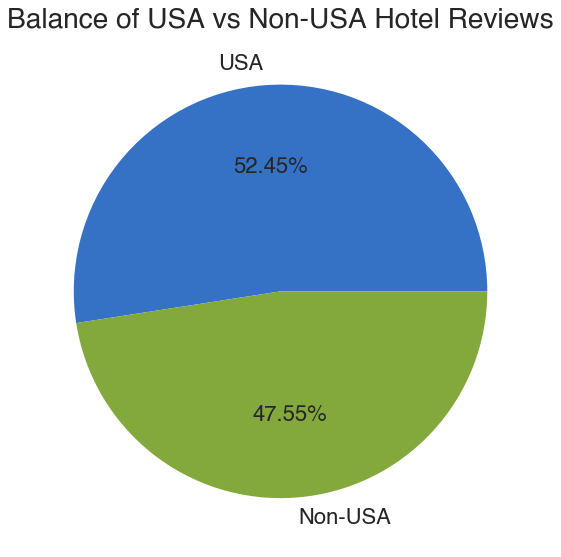

In [56]:
# Plot pie - USA, non-USA reviews
fig, ax = plt.subplots(figsize=(8,8))
hlp.plot_pie(df['usa_str'], fig, ax)
ax.set_title('Balance of USA vs Non-USA Hotel Reviews', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('../images/pie_usa_nonusa_hotel_reviews')

Total Number of Ratings:  2411
Skewness: -0.9656
Kurtosis: 0.5845


Text(0.5, 1.0, 'Distribution of Overall Hotel Ratings')

Text(0.5, 0, 'Overall Hotel Rating')

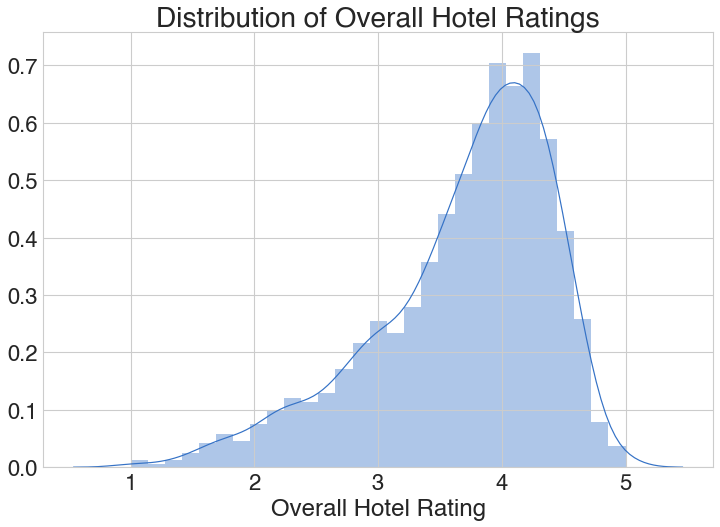

In [57]:
# Plot histogram - Overall hotel ratings
plot_data = df.groupby('hotel_name').mean()
print('Total Number of Ratings: ', len(df['hotel_name'].unique().tolist()))

fig, ax = plt.subplots(figsize=(12,8))
fig, ax = hlp.plot_hist(plot_data, 'overall_ratingsource', fig, ax)
ax.set_title('Distribution of Overall Hotel Ratings', size=BIGGEST_SIZE)
# ax.set_ylabel('blah')
ax.set_xlabel('Overall Hotel Rating')
fig.savefig('../images/hist_ratings_overall')

Text(0.5, 1.0, 'Non-USA vs USA Hotel Ratings')

Text(0, 0.5, 'Hotel Rating')

Text(0.5, 0, 'Hotel Category')

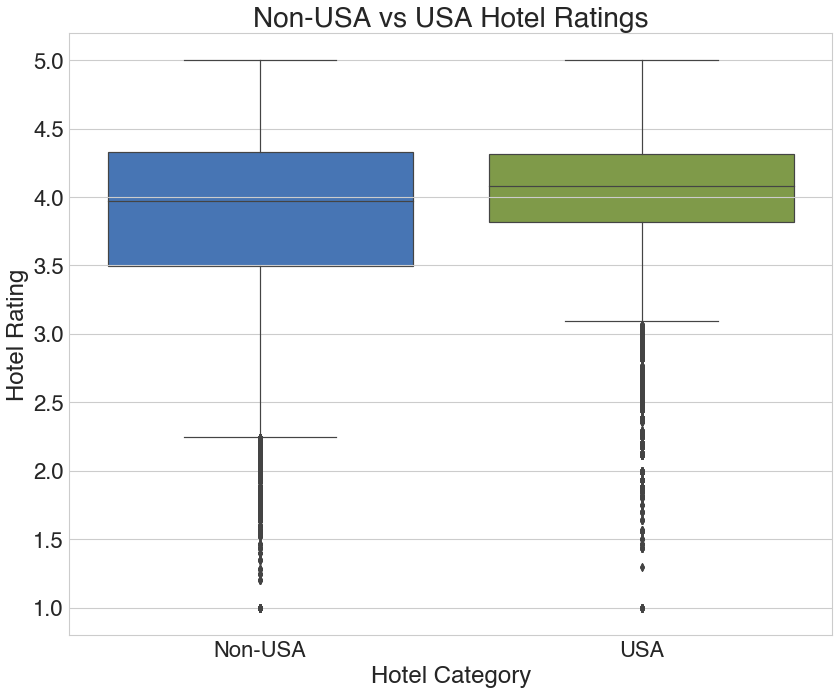

In [58]:
# Plot boxplot - Hotels ratings by USA/non-USA
figsize=(12, 10)
fig, ax = plt.subplots(figsize=figsize)
plot = sns.boxplot(x='usa_str', y='overall_ratingsource', data=df, ax=ax)
ax.set_title('Non-USA vs USA Hotel Ratings', size=BIGGEST_SIZE)
ax.set_ylabel('Hotel Rating')
ax.set_xlabel('Hotel Category')
fig.tight_layout()
fig.savefig('../images/boxplt_usa_nonusa_hotel_ratings')

Total Number of Hotels:  2411


Text(0.5, 1.0, 'Count of Hotels per City')

Text(0, 0.5, 'Count of Hotels')

Text(0.5, 0, 'City')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

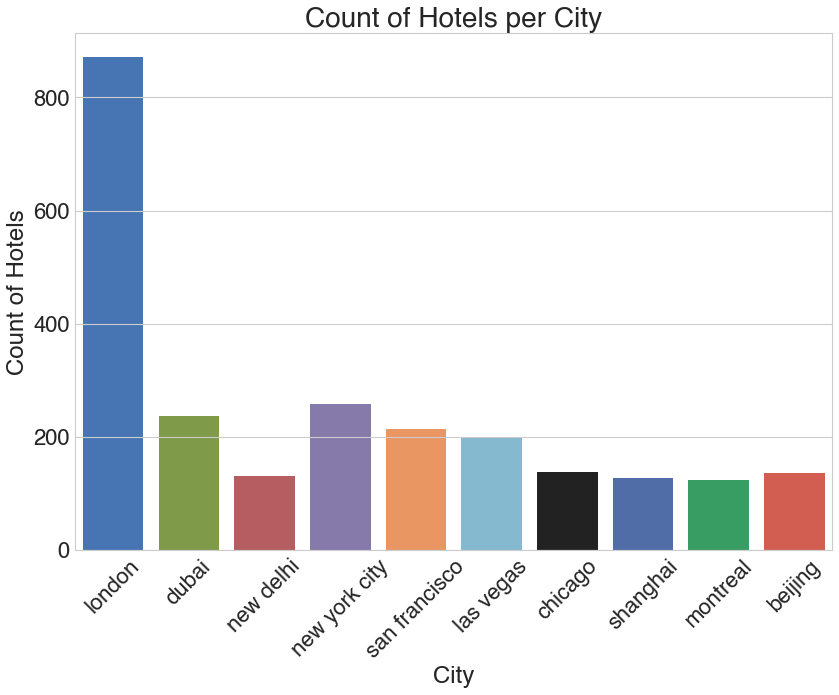

In [59]:
# Plot counts - Hotels per city
plot_data = df.drop_duplicates(['city','hotel_name'])
print('Total Number of Hotels: ', len(df['hotel_name'].unique().tolist()))

fig, ax = plt.subplots(figsize=(12,10))
plot = sns.countplot(data=plot_data, x='city', ax=ax)
ax.set_title('Count of Hotels per City', size=BIGGEST_SIZE)
ax.set_ylabel('Count of Hotels')
ax.set_xlabel('City')
plt.xticks(rotation=45)
fig.tight_layout()
fig.savefig('../images/ctplt_hotels_byCity')

Total Number of Reviews: 229129


Text(0.5, 1.0, 'Count of Hotel Reviews per City')

Text(0, 0.5, 'Count of Hotel Reviews')

Text(0.5, 0, 'City')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

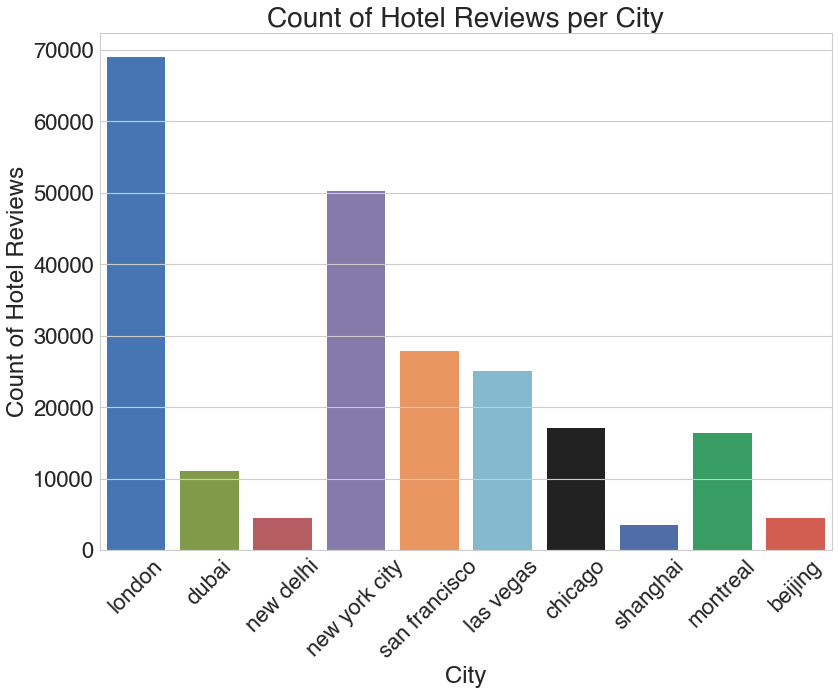

In [60]:
# Plot counts - Hotel reviews per city
print('Total Number of Reviews:', df.shape[0])

fig, ax = plt.subplots(figsize=(12,10))
plot = sns.countplot(data=df, x='city', ax=ax)
ax.set_title('Count of Hotel Reviews per City', size=BIGGEST_SIZE)
ax.set_ylabel('Count of Hotel Reviews')
ax.set_xlabel('City')
plt.xticks(rotation=45)
fig.tight_layout()
fig.savefig('../images/ctplt_hotel_reviews_byCity')

In [61]:
# num_cols = hlp.get_cols_of_type(df, 'number')
# hlp.plot_scattermatrix(df, num_cols, height=2.5)

In [62]:
# hlp.plot_corr(df[num_cols])

# Appendix

In [63]:
# don't go beyond here with Run All
assert False

AssertionError: 

# Initial EDA - CSV data only, no user reviews

In [ ]:
df = df_all_cities_cleaned
df.info()

In [ ]:
df.describe()

In [ ]:
# Set plot sizes
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26
BIGGEST_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

In [ ]:
# Plot histogram - Overall hotel ratings
print('Total Number of Ratings: ', df.shape[0])

fig, ax = plt.subplots(figsize=(12,8))
fig, ax = hlp.plot_hist(df, 'overall_ratingsource', fig, ax)
ax.set_title('Distribution of Overall Hotel Ratings', size=BIGGEST_SIZE)
# ax.set_ylabel('blah')
ax.set_xlabel('Overall Hotel Rating')
fig.savefig('../images/hist_ratings_overall')

In [ ]:
# Plot counts - Hotels per city
print('Total Number of Hotels: ', df.shape[0])

fig, ax = plt.subplots(figsize=(12,8))
plot = sns.countplot(data=df, x='city', ax=ax)
ax.set_title('Count of Hotels per City', size=BIGGEST_SIZE)
ax.set_ylabel('Count of Hotels')
ax.set_xlabel('City')
plt.xticks(rotation=45)
fig.tight_layout()
fig.savefig('../images/ctplt_hotels_byCity')

In [ ]:
df.groupby('city').count()['hotel_name']

In [ ]:
num_cols = hlp.get_cols_of_type(df, 'number')

In [ ]:
hlp.plot_scattermatrix(df, num_cols, height=2.5)

In [ ]:
hlp.plot_corr(df_all_cities_cleaned[num_cols])

# Initial Modeling without User Reviews

In [ ]:
target = 'overall_ratingsource'
df = df_all_cities_cleaned
y = df[target].to_numpy()

## Default Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import sklearn.metrics

In [ ]:
# sorted(sklearn.metrics.SCORERS.keys())

In [ ]:
num_cols = hlp.get_cols_of_type(df, 'number')
cols = num_cols
X = df[num_cols]
X = X.drop(columns=[target]).to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
def fit_pred_score_Nfold(model, X_train, y_train, target, N=10, model_name=None, scoring='neg_mean_squared_error'):
    # Fit model
    model.fit(X_train, y_train)
    # Get N-fold Cross-Validation MSE score
    if model_name is None:
        model_name=model.__class__.__name__
    scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=N)
    score = np.mean(scores)
    print(model_name + ' {}, {}-fold CV on Train Data: {:0.3f}'.format(scoring, N, score))
    return scores

In [ ]:
lr_def = LinearRegression()

In [ ]:
scores = fit_pred_score_Nfold(lr_def, X_train, y_train, target, N=10, model_name=None)
np.mean(np.sqrt(-scores))

In [ ]:
scores = fit_pred_score_Nfold(lr_def, X_train, y_train, target, N=10, model_name=None, scoring='neg_mean_absolute_error')
np.mean(-scores)

In [ ]:
lr_def.fit(X_train, y_train)
y_pred = lr_def.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
mean_absolute_error(y_test, y_pred)

# Load & Merge Extra CSV Data

In [ ]:
# !head '../data/ratingswithcontextandmetadata.csv'

In [ ]:
# extra_data = pd.read_csv('../data/ratingswithcontextandmetadata.csv', sep='|', lineterminator='|')
# extra_data.head()